In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from textwrap import wrap
import random

In [2]:
geo_df = gpd.read_file('India_State_Shapefile/India_State_Boundary.shp')

In [3]:
ABM_states=["andaman & nicobar islands", "dadra & nagar haveli and daman & diu", "chhattisgarh", "haryana", "manipur", "assam", "meghalaya", "gujarat", "kerala", "goa", "jammu & kashmir", "nagaland", "mizoram", "tamil nadu", "west bengal", "maharashtra", "andhra pradesh", "tripura", "chandigarh", "punjab", "himachal pradesh", "telangana", "rajasthan", "uttarakhand", "sikkim", "jharkhand", "uttar pradesh", "lakshadweep", "puducherry", "bihar", "madhya pradesh", "arunachal pradesh", "ladakh", "delhi", "odisha", "karnataka"]

In [4]:
dict_states_replace=dict()

dict_states_replace['andaman & nicobar']='andaman & nicobar islands'
dict_states_replace['daman and diu and dadra and nagar haveli']='dadra & nagar haveli and daman & diu'
dict_states_replace['tamilnadu']='tamil nadu'
dict_states_replace['chhattishgarh']='chhattisgarh'
dict_states_replace['telengana']='telangana'
dict_states_replace['jammu and kashmir']='jammu & kashmir'

In [5]:
names_replaced=[]

for name in geo_df['Name']:
    try:
        names_replaced+=[dict_states_replace[name.lower()]]
    except:
        names_replaced+=[name.lower()]
        
geo_df['Name']=names_replaced #Adusted state names so that they are consistent between the geopandas DataFrame and
                                #the naming in the ABM (so that DataFrames can be merged at the state level)

In [6]:
print([i for i in geo_df['Name'].values if i not in ABM_states], #Double check that names are consistent
[i for i in ABM_states if i not in geo_df['Name'].values])

[] []


In [7]:
geo_df['vals']=[random.uniform(0, 0.13) for i in range(len(geo_df))] #random values

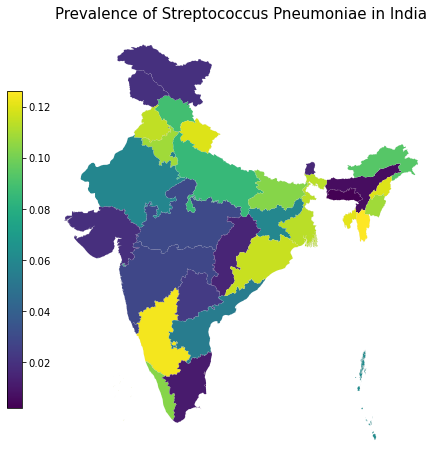

In [8]:
title = "\n".join(wrap("Prevalence of Streptococcus Pneumoniae in India", 50))
col = 'vals'
cmap='viridis'

fig, ax = plt.subplots(1, figsize=(20, 8))

ax.axis('off')
geo_df.plot(column=col, ax=ax,edgecolor='0.8', linewidth=0.05, cmap=cmap,missing_kwds={'color': 'lightgrey'})

ax.set_title(title, fontdict={'fontsize': '15', 'fontweight': '3'})


# Create colorbar
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=geo_df[col].min(), vmax=geo_df[col].max()), cmap=cmap)

# Add colorbar to figure
cbaxes = fig.add_axes([0.35, 0.215, 0.01, 0.55])
cbar = fig.colorbar(sm, cax=cbaxes)
plt.savefig('Figures/Prevalence of Streptococcus Pneumoniae in India.svg',facecolor='white',bbox_inches='tight')